In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

neighborhoods = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/neighborhoods.geojson")
trees = gpd.read_file("https://data.wprdc.org/dataset/9ce31f01-1dfa-4a14-9969-a5c5507a4b40/resource/d876927a-d3da-44d1-82e1-24310cdb7baf/download/trees_img.geojson")

# Step One
Our first step is to import GeoPoandas and matplotlib for creating visuals. Then we bring in the data from our [WPRDC](https://data.wprdc.org/dataset) source. Instead of downloading the data, I prefer to import it diretly from the database because these datasets are updated regularly.

In [2]:
trees = trees.to_crs(neighborhoods.crs)

# Step Two
This step is optional but I wanted to include it for stability. This line of code ensures that both datasets are in the same Coordinate Reference System so that when we join the datasets they are aligned.

In [3]:
trees_with_neighborhoods = gpd.sjoin(trees, neighborhoods, how="inner", predicate="within")
tree_counts = trees_with_neighborhoods.groupby("hood").size().reset_index(name='tree_count')

neighborhoods_with_counts = neighborhoods.merge(tree_counts, on="hood", how="left")
neighborhoods_with_counts["tree_count"] = neighborhoods_with_counts["tree_count"].fillna(0).astype(int)

# Step Three
This code first joins the two datasets, then groups the entries by neighborhood and counts the number of entires in each group. Next, it merges the data back into the neighborhoods data set. This gives us a list of neighborhoods with the counts of trees.

In [8]:
neighborhoods_with_counts['trees_per_area'] = neighborhoods_with_counts['tree_count'] / neighborhoods_with_counts['Shape__Area']
max_tree_count = neighborhoods_with_counts['trees_per_area'].max()
neighborhoods_with_counts['proportion'] = neighborhoods_with_counts['trees_per_area'] / max_tree_count

neighborhoods_with_counts = neighborhoods_with_counts.sort_values(by='proportion', ascending=False)
neighborhoods_with_counts.reset_index(drop=True, inplace=True)

# Step Four
This code creates a new index that ranks each neighborhoods trees proportional to the neighborhood with the greatest number of trees per area. This gives us a metric that we can plug into our master formula later. We also sort by this metric and reset the index.

In [9]:
trees_final = neighborhoods_with_counts[['hood', 'tree_count', 'proportion']]

# Step Five
We create a new data frame that only contains the data that we'll need in the final formula.

# Step Six
The following code generates a plot of neighborhoods and colors the reigon by the number of trees. Finally, we print the ten neightborhoods with the most trees.

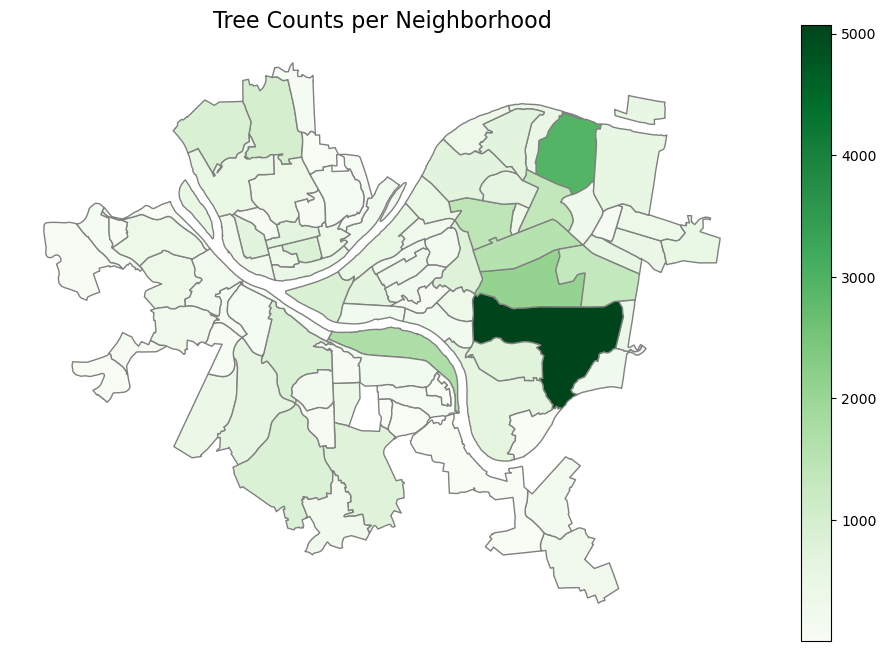

                  hood  tree_count  proportion
0     Allegheny Center         867    1.000000
1           Friendship         362    0.821514
2       Allegheny West         386    0.642439
3    Central Northside         674    0.625490
4           Manchester         707    0.610570
5        Highland Park        2941    0.605839
6         East Liberty        1366    0.566222
7        Regent Square         432    0.530566
8           Bloomfield        1436    0.493010
9  Squirrel Hill South        5070    0.456478


In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
neighborhoods_with_counts.plot(
    column='tree_count',
    cmap='Greens',
    ax=ax,
    legend=True,
    edgecolor='gray'
)

ax.set_title("Tree Counts per Neighborhood", fontsize=16)
ax.axis("off")
plt.show()

print(trees_final.head(10))